### 建立神經網路

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import fashion_mnist

#load the fashion_mnist dataset from tf.keras datasets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#Process data
x_train = x_train.reshape(-1, 28, 28, 1) # Expend dimension for 1 channel image
x_test = x_test.reshape(-1, 28, 28, 1)
x_train = x_train / 255 # Normalize
x_test = x_test / 255 # Normalize

#One hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

#Build ConvNet model with tf.keras
def ConvNet(width, height, depth, classes):
    
    #initialize the model
    model = Sequential()
    
    # first layer, convolution and pooling
    model.add(Conv2D(input_shape=(width, height, depth), filters=6, kernel_size=(5, 5), strides=(1, 1), padding='valid', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    # second layer, convolution and pooling
    model.add(Conv2D(input_shape=(width, height, depth), filters=16, kernel_size=(5, 5), strides=(1, 1), padding='valid', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    # Fully connection layer
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    
    # softmax classifier
    model.add(Dense(classes, activation='softmax'))
    
    return model
              

In [2]:
ConvNet_model = ConvNet(28, 28, 1, 10)

In [3]:
ConvNet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8

In [4]:
ConvNet_model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), metrics=['accuracy'])

### 調整部分
    1. 在ConvNet中，只有卷積和池化只有重複一次，就進入全連結神經網路
    2. 在第一層和第二層的filter分別為(6, 16)， 而卷積核大小是5*5，沒有做padding
    3. DNN中的神經元數目分別是(128, 64)

In [5]:
#Start training
History = ConvNet_model.fit(x_train, y_train, batch_size=30, epochs=10, validation_data=(x_test, y_test))
loss, accuracy = ConvNet_model.evaluate(x_test, y_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 242us/sample - loss: 1.8714 - accuracy: 0.4007 - val_loss: 1.1252 - val_accuracy: 0.5895
Epoch 2/10
60000/60000 [==============================] - 14s 238us/sample - loss: 0.9274 - accuracy: 0.6610 - val_loss: 0.8641 - val_accuracy: 0.6746
Epoch 3/10
60000/60000 [==============================] - 15s 246us/sample - loss: 0.7976 - accuracy: 0.7039 - val_loss: 0.7667 - val_accuracy: 0.7166
Epoch 4/10
60000/60000 [==============================] - 14s 238us/sample - loss: 0.7307 - accuracy: 0.7284 - val_loss: 0.7271 - val_accuracy: 0.7312
Epoch 5/10
60000/60000 [==============================] - 14s 239us/sample - loss: 0.6824 - accuracy: 0.7437 - val_loss: 0.6821 - val_accuracy: 0.7522
Epoch 6/10
60000/60000 [==============================] - 16s 269us/sample - loss: 0.6422 - accuracy: 0.7619 - val_loss: 0.6383 - val_accuracy: 0.7546
Epoch 7/10
60000/60000 [====================

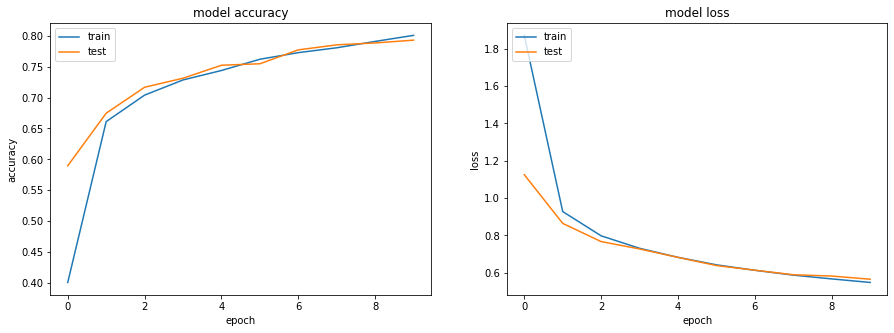

In [6]:
plt.figure(figsize= (15, 5))
plt.subplot(1, 2, 1)
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.show()

#### 尚未測試的問題
    1. 不同lr對答案的影響
    2. 不同batch_size對答案的影響